#BT1 - Selection Operators for Genetic Algorithm with POPOP implementation.

Chào cả lớp,

Trong bài tập này, các em cần cài đặt Genetic Algorithm theo bản cài đặt POPOP. Tham khảo slide 02 để hiểu cơ chế thuật toán.

1.   Sử dụng Lai ghép đồng nhất (uniform crossover) và không cài đặt Đột biến (mutation). Thuật toán cài đặt cần được chạy thực nghiệm với 3 cơ chế chọn lọc sau đây:

>*   Tournament selection: Chọn lọc giao đấu, không thay thế (without replacement), với tournament size = 4 để chọn N cá thể từ (P+O) pool có kích thước 2N. Đây là cơ chế chọn lọc chuẩn trong POPOP.

>*   Truncation selection: Chọn N cá thể có fitness tốt nhất từ (P+O) pool có kích thước 2N.

>*   Proportional selection: Chọn N cá thể từ (P+O) pool có kích thước 2N. Mỗi cá thể có xác suất được chọn lọc dựa trên độ thích nghi của cá thể đó so với tổng độ thích nghi của quần thể.

2.   Chúng ta đánh giá hiệu năng của thuật toán thông qua 3 hàm benchmark sau đây:

>*   Onemax với 100 bit.

>*   LeadingOne với 10 bit.

>*   Concatenated Trap-5 với 20 bit.

>Đối với mỗi hàm benchmark, chúng ta cần chạy thực nghiệm để thống kê so sánh hiệu năng của 3 phép chọn lọc bên trên. Mỗi hàm benchmark cần có một đồ thị kết quả, trong đó thể hiện đường trung bình (và độ lệch chuẩn tính trên 10 lần chạy)

Lưu ý: Kích thước quần thể ảnh hưởng rất lớn đến hiệu năng của thuật toán.

10 random seed sử dụng là MSSV+0 -> MSSV+9 với MSSV là mã số sinh viên của mỗi bạn.

7 tháng 3 2024, 1:03 PM

In [ ]:
# suppresses warnings
# By using warnings.filterwarnings('ignore'), you are telling Python to ignore all warnings.
import warnings
warnings.filterwarnings('ignore')

# "%matplotlib inline" is a magic command specifically used in Jupyter notebooks.
# It instructs Matplotlib, a popular Python library for creating visualizations, to display any generated plots directly within the notebook itself.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## Hàm khởi tạo quần thể
Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

* Arguments:
>* num_individuals -- Số lượng cá thể
>* num_variables -- Số lượng biến

* Returns:
>* pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.

In [ ]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [ ]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[1 1 0 1]
 [0 0 1 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 1 1]
 [1 1 0 1]
 [1 1 0 0]
 [1 0 0 0]]


## Hàm đánh giá OneMax
Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [ ]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [ ]:
onemax(pop[5,:])

3

## Hàm chọn lọc truncation_selection
Chọn N cá thể có fitness tốt nhất từ (P+O) pool có kích thước 2N.

Takes an array of fitness values (pop_fitness) and returns an array of indices corresponding to the most fit individuals in the population

* Input:
>* pop: quần thể
>* pop_fitness: độ thích nghi của các cá thể trong quần thể
>* selection_size: số lượng cá thể được chọn

* Output:
>* selected_indices: danh sách chỉ số của các cá thể được chọn


In [ ]:
def truncation_selection(pop, pop_fitness, selection_size):
    # takes an array of fitness values (pop_fitness) and returns an array of indices corresponding to the most fit individuals in the population
        # np.argsort(pop_fitness): This part sorts the pop_fitness array in ascending order by default.
        # The np.argsort function returns an array of indices that would reorder the original array if you used those indices for indexing.
        # For example, if pop_fitness was [0.3, 0.8, 0.1, 0.9, 0.5], then np.argsort(pop_fitness) would return [0, 2, 1, 4, 3].
        # This means the element at index 0 in the original array (0.3) is the smallest, the element at index 2 (0.1) is the second smallest, and so on.

        # [-selection_size:]: This slicing operation extracts a sub-array from the sorted indices array.
        # Slicing works by specifying the starting and ending indices separated by a colon.
        # In this case, the negative sign - indicates counting from the end of the array.
        # So, [-selection_size:] refers to all elements from the selection_sizeth element from the end (inclusive) to the very last element.

    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

## Hàm chọn lọc Tournament selection
Chọn lọc giao đấu, không thay thế (without replacement), với tournament size = 4 để chọn N cá thể từ (P+O) pool có kích thước 2N. Đây là cơ chế chọn lọc chuẩn trong POPOP.

Takes an array of fitness values (pop_fitness) and returns an array of indices corresponding to the most fit individuals in the population



In [ ]:
def tournament_selection(pop, pop_fitness, selection_size):


## Hàm lai ghép đồng nhất (uniform crossover)
Hàm biến đổi tạo ra các cá thể con.

* Arguments:
>* pop -- Quàn thể hiện tại.

* Returns:
>* offspring -- Quần thể chứa các cá thể con được sinh ra.

In [ ]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])

    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(num_individuals)

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

## Hàm đột biến

In [ ]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

## Hàm genetic_algorithm

* Input
>* objective: hàm đánh giá đtn - fitness
>* num_individuals: số cá thể trong quần thể mỗi thế hệ
>* num_parameters: số gen / bit của cá thể
>* max_evaluations: số lần đánh giá đtn - fitness tối đa
>* verbose=False: ==True -> in kết quả trong quá rình chạy

* Output
>* pop: quần thể kết quả
>* pop_fitness: đtn các cá thể trong quần thể kết quả
>* best_fitness: đtn của cá thể tốt nhất qua từng thế hệ


In [ ]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)    # khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])   # tính độ thích nghi
    num_evaluations = num_individuals   # tính số lần đánh giá đã dùng
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2   # số cá thể được chọn lọc = nửa kích thước quần thể

    # nếu số lần đánh giá đã dùng < số lần đánh giá tối đa thì tiếp tục
    # nếu không thì kết thúc
    while num_evaluations < max_evaluations:

        # chọn lọc ra các cá thể để lai ghép
        best_fitness.append([num_evaluations, np.max(pop_fitness)])   # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )   # chọn lọc -> danh sách chỉ số của các cá thể được chọn
        selection_set = pop[selected_indices]   # lấy ra các cá thể được chọn
        selection_fitness = pop_fitness[selected_indices]   # lấy đtn của các cá thể được chọn

        # lai ghép tạo ra thế hệ con
        offspring = crossover(selection_set)    # lai ghép -> list các cá thể con
        # offspring = mutation(offspring, 0.1)    # đột biến
        offspring_fitness = np.array([objective(ind) for ind in offspring])   # tính đtn của các cá thể con
        num_evaluations += len(offspring)   # cộng thêm số lần đánh giá đã dùng

        # combines two arrays, selection_set and offspring, into a single new array called pop
        # kết hợp selection_set và offspring thành pop - quần thể mới
        # stacking the two arrays selection_set and offspring on top of each other, one row after another, to form a new array pop
        pop = np.vstack([selection_set, offspring])

        # kết hợp selection_fitness và offspring_fitness thành pop_fitness - đtn của quần thể mới
        # np.concatenate function takes a tuple of arrays (enclosed in parentheses ()) that you want to join together and concatenates them along a specified axis
        # By default, np.concatenate concatenates arrays along the first axis (typically rows).
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)
    # end_while

    best_fitness.append([num_evaluations, np.max(pop_fitness)])   # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


## Chạy 1 lần

In [ ]:
np.random.seed(42)
num_parameters = 100
num_individuals = 64
max_evaluations = 100000

pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

### Thống kê kết quả

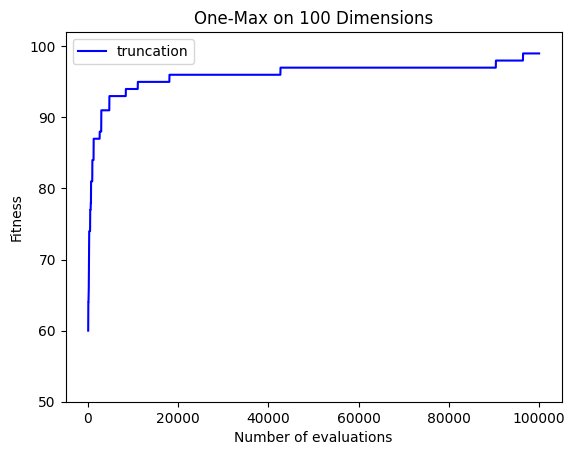

In [ ]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')

plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters+2)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

## Chạy thử nhiều lần

In [ ]:
n_trials = 10
num_parameters = 100
max_evaluations = 100000
num_individuals = 8 # population size

fits_truncation = []
evals = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals = best_fitness[:,0]
    fits_truncation.append(best_fitness[:,1])

### Thống kê kết quả

In [ ]:
fits_truncation = np.array(fits_truncation)

In [ ]:
fits_truncation

array([[ 55,  63,  63, ..., 100, 100, 100],
       [ 64,  64,  64, ...,  99,  99,  99],
       [ 63,  63,  63, ...,  98,  98,  98],
       ...,
       [ 56,  58,  61, ...,  99,  99,  99],
       [ 59,  59,  59, ..., 100, 100, 100],
       [ 52,  55,  59, ...,  99,  99,  99]])

In [ ]:
# calculates the average fitness and standard deviation of fitness scores across columns in a 2D array named fits_truncation
# axis=0: This argument specifies that the mean and standard deviation should be calculated along axis 0. In a 2D array, axis 0 refers to the columns.

# The np.mean(fits_truncation, axis=0) part calculates the average value of each column in the fits_truncation array.
# if fits_truncation has shape(rows, columns), then avg will be a 1D array of length columns where each element represents the mean fitness value for the corresponding column in the original array.

avg = np.mean(fits_truncation, axis=0)
err = np.std(fits_truncation, axis=0)
avg

array([58.5, 60.2, 61.4, ..., 99. , 99. , 99. ])

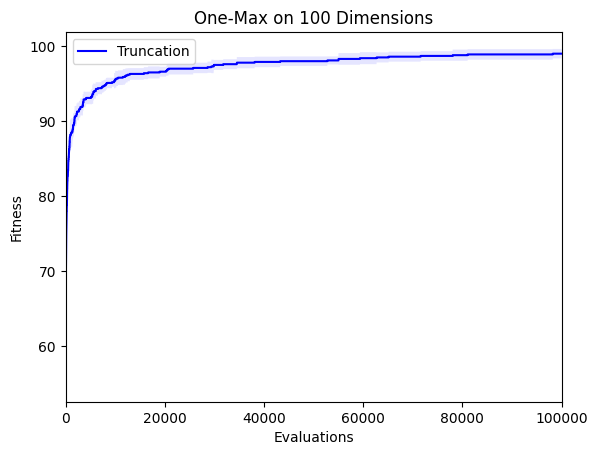

In [ ]:
plt.plot(evals, avg, label="Truncation", color='b')
plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();